In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Confirm shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [4]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 15:
        return 0.0005
    else:
        return 0.0001

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,370 (1.04 MB)

 Trainable params: 270,346 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=2,
    callbacks=[LearningRateScheduler(lr_schedule)]
)

Epoch 1/20
422/422 - 8s - 18ms/step - accuracy: 0.7954 - loss: 0.5819 - val_accuracy: 0.8390 - val_loss: 0.4395 - learning_rate: 1.0000e-03
Epoch 2/20
422/422 - 5s - 12ms/step - accuracy: 0.8427 - loss: 0.4366 - val_accuracy: 0.8583 - val_loss: 0.3954 - learning_rate: 1.0000e-03
Epoch 3/20
422/422 - 6s - 14ms/step - accuracy: 0.8561 - loss: 0.3975 - val_accuracy: 0.8617 - val_loss: 0.3825 - learning_rate: 1.0000e-03
Epoch 4/20
422/422 - 4s - 10ms/step - accuracy: 0.8607 - loss: 0.3773 - val_accuracy: 0.8585 - val_loss: 0.3801 - learning_rate: 1.0000e-03
Epoch 5/20
422/422 - 6s - 13ms/step - accuracy: 0.8648 - loss: 0.3677 - val_accuracy: 0.8607 - val_loss: 0.3589 - learning_rate: 1.0000e-03
Epoch 6/20
422/422 - 4s - 10ms/step - accuracy: 0.8762 - loss: 0.3353 - val_accuracy: 0.8803 - val_loss: 0.3242 - learning_rate: 5.0000e-04
Epoch 7/20
422/422 - 4s - 10ms/step - accuracy: 0.8790 - loss: 0.3258 - val_accuracy: 0.8770 - val_loss: 0.3254 - learning_rate: 5.0000e-04
Epoch 8/20
422/422 -

In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8926 - loss: 0.3072

Test Accuracy: 0.8926


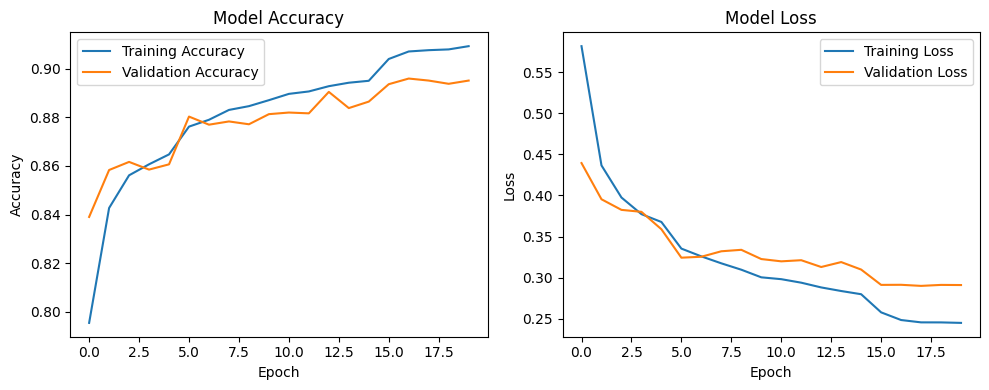

In [8]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()